<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [9]:
function binomial_p(n,k,p)
PX = (factorial(n)./(factorial(k).*factorial(n.-k))).*(p.^k).*(1-p).^(n-k)
end

binomial_p (generic function with 2 methods)

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [11]:
win = binomial_p(10,5,0.4)

0.20065812480000003

The chance of losing the bet:

In [12]:
lose = 1-binomial_p(10,5,0.4)

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

I would expect to lose in this game because the coin is unfairly bias towards tails, which is against the winning odds. 

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [16]:
win = binomial_p(10,4,0.4)
lose = 1-binomial_p(10,4,0.4)
println("the chances of winning is $win and chances of losing is $lose")

the chances of winning is 0.250822656 and chances of losing is 0.749177344


I would still expect to lose because the odds are still against flipping heads and winning

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials: Polynomial, fit, coeffs
import Random
import Statistics
using Statistics
using Plots

In [3]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [4]:
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 0.41170715029172406
 2.683725481391197

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [5]:
function chisqr(b,m,x,y_observed,sigma)
    return sum((y_observed .- m .* x .-b).^2/sigma^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [7]:
chi2_list = []
for i in 1:10000
    sigma = 3
    y_true = 3 .* x .- 2
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    line_fit = fit(x,y_observed,1)
    fit_coeff = coeffs(line_fit)
    push!(chi2_list,chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end 

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [8]:
mean(chi2_list)

8.995339594484348

The degree of freedom or mean of chi-squared is the number of data points subtracted by the number of parameters or coefficients. There are 11 data points and 2 coefficients in our equation, thus the degree of freedom makes sense to be about 9.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

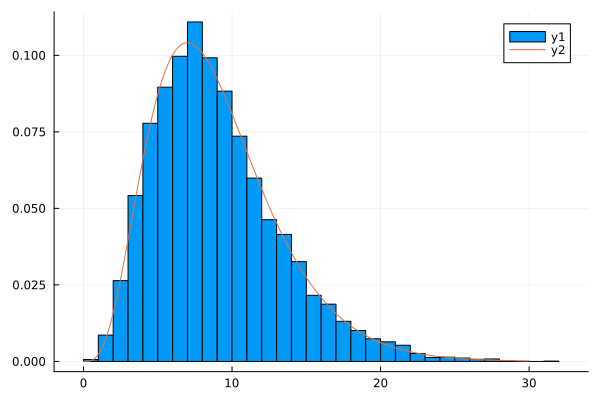

In [9]:
chi2 = di.Chisq(mean(chi2_list))
x_dist = 0:0.1:30
chipdf = di.pdf.(chi2,x_dist)
histogram(chi2_list, bin=50, normalize = true)
plot!(x_dist, chipdf)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [10]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

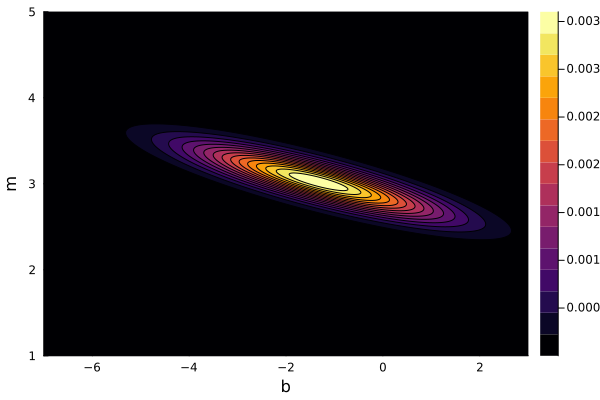

In [11]:
x = 0:1:10
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

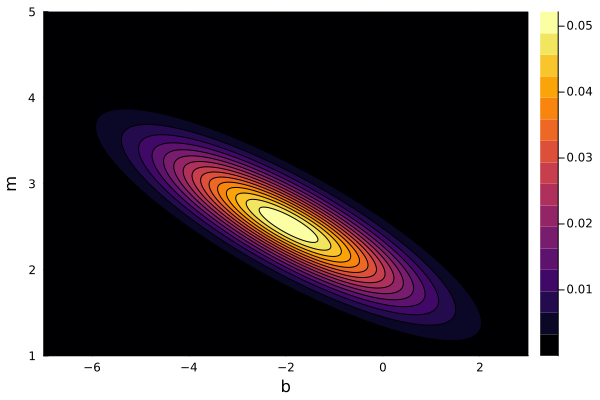

In [12]:
x = 0:0.5:5
y_true = 3 .* x .- 2
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The contour is more spread out compared to 2.6 due to the x-range being narrower. Now, it is more difficult to measure the slope and is more spread out in the slope axis. A smaller range can also reduce the correlation between the slope and intercept, thus developing a more slanted contour (as compared to 2.6), an anticorrelation for instance. 

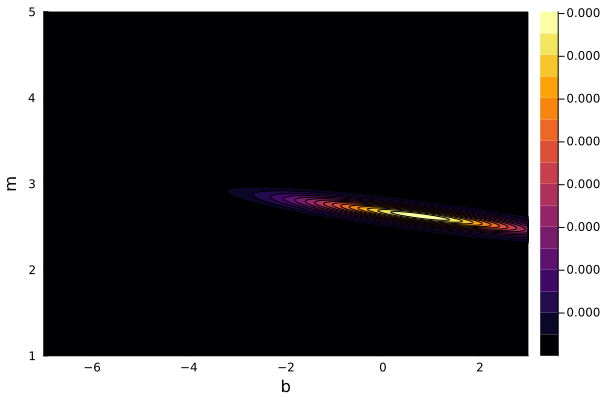

In [13]:
x = 0:2:20
y_true = 3 .* x .- 2
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

As compared to 2.6, this contour is more compact due to the larger x-range. The slope range is more narrow now and easier to measure. It is also less slanted, meaning greater correlation between the slope and intercept. The intercept is also as broad as 2.6 since the long axis hasn't changed much. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

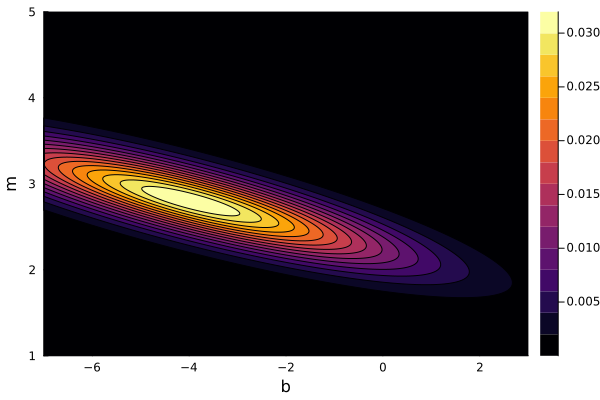

In [14]:
x = 0:1:10
sigma = 5
y_true = 3 .* x .- 2
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

The contour is much wider than 2.6 in both the slope and intersect axis. The slope is much harder to measure and since the intercept is also wider, this indicates a wider distribution or error. The slant is also similar to 2.6. 

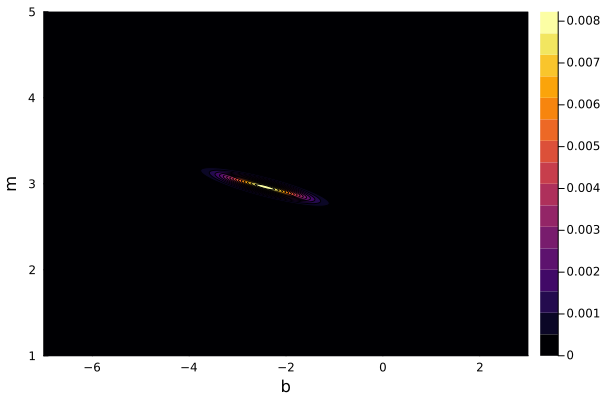

In [15]:
x = 0:1:10
sigma = 1
y_true = 3 .* x .- 2
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
contourf(b_range,m_range,p_chi2poly,xlabel="b",ylabel="m")

Now that the noise is smaller, the contour is much tighter as compared to 2.6. Here, the slope can be measured, with a narrower distribution and smaller error. There is also a slant, indicating anticorrelation. 